# Investigating the Dynamics of a Forced Damped Pendulum

## 1. Theoretical Foundation

### Differential Equation

The differential equation governing the motion of a forced damped pendulum is:

$\frac{d^2\theta}{dt^2} + b\frac{d\theta}{dt} + \frac{g}{L}\sin(\theta) = A\cos(\omega t)$

Where:

* $\theta$ is the angular displacement.
* $b$ is the damping coefficient.
* $g$ is the acceleration due to gravity.
* $L$ is the length of the pendulum.
* $A$ is the driving amplitude.
* $\omega$ is the driving frequency.

### Small-Angle Approximation

For small angles, $\sin(\theta) \approx \theta$. The equation simplifies to:

$\frac{d^2\theta}{dt^2} + b\frac{d\theta}{dt} + \frac{g}{L}\theta = A\cos(\omega t)$

### Approximate Solutions

The general solution is the sum of the homogeneous (transient) and particular (steady-state) solutions.

### Resonance Conditions

Resonance occurs when $\omega \approx \sqrt{g/L}$, leading to maximum amplitude oscillations.

## 2. Analysis of Dynamics

* **Damping Coefficient (b):** Influences the rate of decay of oscillations.
* **Driving Amplitude (A):** Affects the amplitude of oscillations and can lead to nonlinear behavior.
* **Driving Frequency (ω):** Determines the system's response; resonance occurs when $\omega$ is close to the natural frequency.
* **Transition to Chaos:** Can be observed through phase portraits, Poincaré sections, and bifurcation diagrams.

## 3. Practical Applications

* Energy harvesting devices
* Suspension bridges
* Oscillating circuits
* Metronomes
* Various mechanical systems

## 4. Implementation



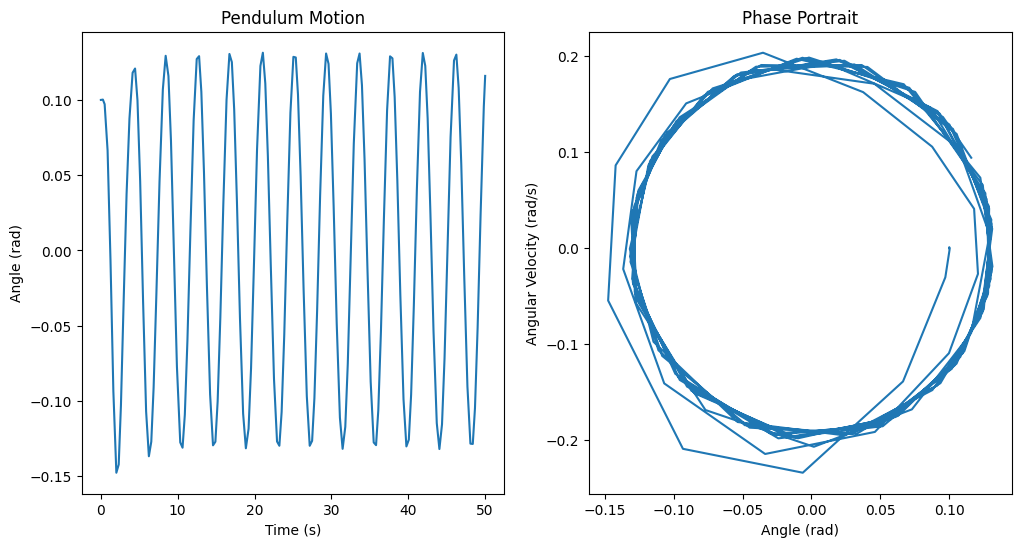

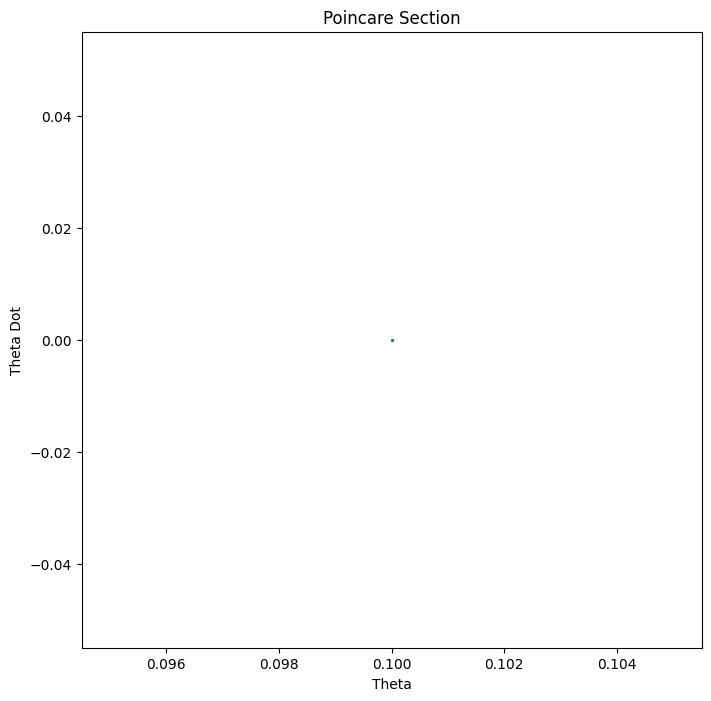

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def pendulum_equation(t, y, b, g, L, A, omega):
    theta, theta_dot = y
    dtheta_dt = theta_dot
    dtheta_dot_dt = -b * theta_dot - (g / L) * np.sin(theta) + A * np.cos(omega * t)
    return [dtheta_dt, dtheta_dot_dt]

def simulate_pendulum(b, g, L, A, omega, t_span, y0):
    sol = solve_ivp(pendulum_equation, t_span, y0, args=(b, g, L, A, omega), dense_output=True)
    return sol.t, sol.y[0], sol.y[1]

# Parameters
b = 0.5  # Damping coefficient
g = 9.81  # Gravity
L = 1.0  # Length
A = 1.0  # Driving amplitude
omega = 1.5  # Driving frequency
t_span = (0, 50)
y0 = [0.1, 0.0]  # Initial conditions

# Simulation
t, theta, theta_dot = simulate_pendulum(b, g, L, A, omega, t_span, y0)

# Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t, theta)
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Pendulum Motion')

plt.subplot(1, 2, 2)
plt.plot(theta, theta_dot)
plt.xlabel('Angle (rad)')
plt.ylabel('Angular Velocity (rad/s)')
plt.title('Phase Portrait')
plt.show()

#Poincare section.
def poincare_section(t,theta,thetadot, omega, period):
    poincare_theta = []
    poincare_thetadot = []
    for i in range(len(t)):
        if abs(t[i]%period) < 0.01:
            poincare_theta.append(theta[i])
            poincare_thetadot.append(thetadot[i])
    return poincare_theta, poincare_thetadot

period = 2*np.pi/omega
poincare_theta, poincare_thetadot = poincare_section(t,theta,theta_dot, omega, period)
plt.figure(figsize = (8,8))
plt.scatter(poincare_theta, poincare_thetadot, s = 2)
plt.title("Poincare Section")
plt.xlabel("Theta")
plt.ylabel("Theta Dot")
plt.show()